Entrenando red neuronal con capa oculta...

Época 0: Error cuadrático medio = 8206.2696
Época 1000: Error cuadrático medio = 0.0159
Época 2000: Error cuadrático medio = 0.0160
Época 3000: Error cuadrático medio = 0.0161
Época 4000: Error cuadrático medio = 0.0161
Época 5000: Error cuadrático medio = 0.0161
Época 6000: Error cuadrático medio = 0.0161
Época 7000: Error cuadrático medio = 0.0161
Época 8000: Error cuadrático medio = 0.0160
Época 9000: Error cuadrático medio = 0.0159

Entrenamiento completado!


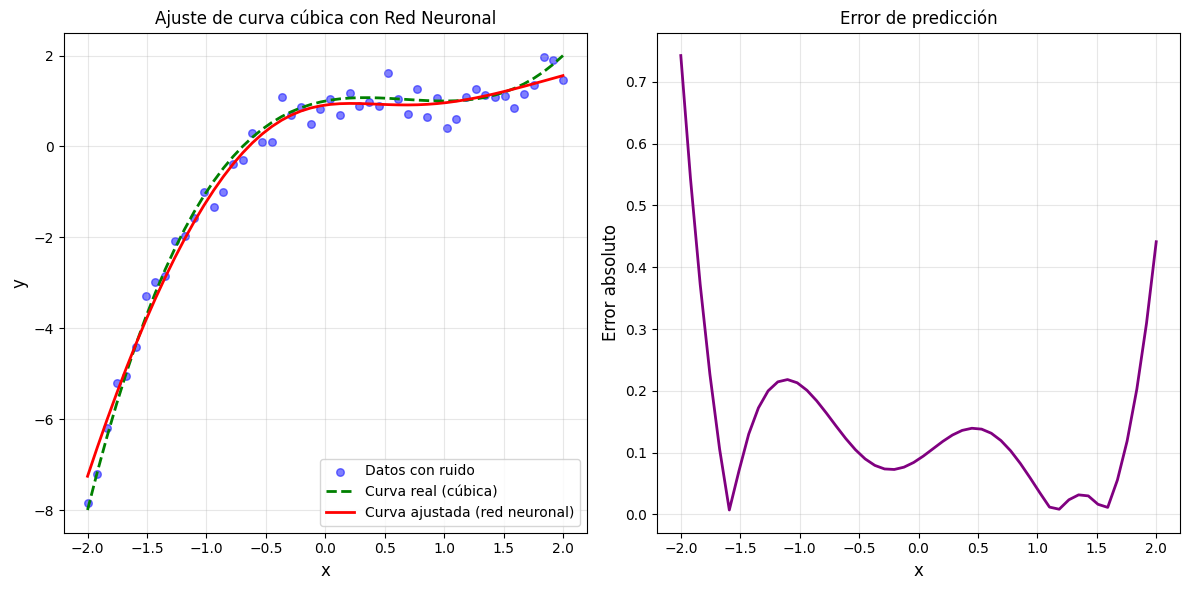


Métricas finales:
Error cuadrático medio: 0.0395
Error absoluto medio: 0.1453


In [5]:
import matplotlib.pyplot as plt
import numpy as np

class PerceptronMulticapa:
    def __init__(self, neuronas_ocultas=5):
        """Red neuronal simple con una capa oculta"""
        # Pesos de entrada a capa oculta
        self.w1 = np.random.randn(neuronas_ocultas) * 0.5
        self.b1 = np.zeros(neuronas_ocultas)
        
        # Pesos de capa oculta a salida
        self.w2 = np.random.randn(neuronas_ocultas) * 0.5
        self.b2 = 0.0
    
    def sigmoid(self, x):
        """Función de activación sigmoide"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def predecir(self, x):
        """Predice el valor de y para un valor de x dado"""
        # Capa oculta
        z1 = self.w1 * x + self.b1
        a1 = self.sigmoid(z1)
        
        # Capa de salida
        z2 = np.sum(self.w2 * a1) + self.b2
        return z2
    
    def aprender(self, X, y, ajuste=0.1, epochs=2000):
        """Entrena la red usando retropropagación"""
        n = len(X)
        
        for epoch in range(epochs):
            error_total = 0
            
            for xi, yi in zip(X, y):
                # Forward pass
                z1 = self.w1 * xi + self.b1
                a1 = self.sigmoid(z1)
                z2 = np.sum(self.w2 * a1) + self.b2
                y_pred = z2
                
                # Calcular error
                error = yi - y_pred
                error_total += error ** 2
                
                # Backward pass (retropropagación)
                # Gradiente de la salida
                d_z2 = error
                d_w2 = d_z2 * a1
                d_b2 = d_z2
                
                # Gradiente de la capa oculta
                d_a1 = d_z2 * self.w2
                d_z1 = d_a1 * a1 * (1 - a1)  # derivada de sigmoid
                d_w1 = d_z1 * xi
                d_b1 = d_z1
                
                # Actualizar pesos
                self.w2 += ajuste * d_w2
                self.b2 += ajuste * d_b2
                self.w1 += ajuste * d_w1
                self.b1 += ajuste * d_b1
            
            # Mostrar progreso
            if epoch % 1_000 == 0:
                mse = error_total / n
                print(f"Época {epoch}: Error cuadrático medio = {mse:.4f}")
        
        print(f"\nEntrenamiento completado!")

# Generar datos de una función cúbica con ruido
np.random.seed(42)
X = np.linspace(-2, 2, 50)
y_real = 0.5 * X**3 - X**2 + 0.5 * X + 1  # Función cúbica
y = y_real + np.random.normal(0, 0.3, len(X))  # Agregar ruido

# Normalizar datos para mejor entrenamiento
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Crear y entrenar la red
print("Entrenando red neuronal con capa oculta...\n")
red = PerceptronMulticapa(neuronas_ocultas=1000)
red.aprender(X_norm, y_norm, ajuste=0.01, epochs=10_000)

# Predicciones
y_pred_norm = np.array([red.predecir(x) for x in X_norm])
y_pred = y_pred_norm * y.std() + y.mean()  # Desnormalizar

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfica principal
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, s=30, label='Datos con ruido')
plt.plot(X, y_real, 'g--', label='Curva real (cúbica)', linewidth=2)
plt.plot(X, y_pred, 'r-', label='Curva ajustada (red neuronal)', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Ajuste de curva cúbica con Red Neuronal')

# Gráfica de error
plt.subplot(1, 2, 2)
errores = np.abs(y_real - y_pred)
plt.plot(X, errores, 'purple', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.grid(True, alpha=0.3)
plt.title('Error de predicción')
plt.tight_layout()
plt.show()

# Calcular métricas
mse = np.mean((y_real - y_pred)**2)
mae = np.mean(np.abs(y_real - y_pred))
print(f"\nMétricas finales:")
print(f"Error cuadrático medio: {mse:.4f}")
print(f"Error absoluto medio: {mae:.4f}")